### Cómo crear clasificadores ante clases debalanceadas asignando pesos

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 


def matriz_de_confusion(clases_reales, clases_predichas, titulo):
    """ Visualización de la Matriz de Confusión """
    
    matriz = confusion_matrix(clases_reales, clases_predichas)
    accuracy = accuracy_score(clases_reales, clases_predichas)
    
    # Graficamos con matplotlib
    plt.figure(figsize=(4, 4))
    
    matriz = pd.DataFrame(matriz, columns=["0: Sano", "1: Cáncer"])
    
    plt.matshow(matriz, cmap="summer", vmin=0, vmax=20, fignum=1)
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas = (("Verdaderos\nnegativos", "Falsos\npositivos"),
                 ("Falsos\nnegativos", "Verdaderos\npositivos"))
    plt.text(1.60, -0.30, titulo, fontsize=25, c="red")
    plt.text(2.1, 0.10, "Accuracy: %0.2f" % accuracy, fontsize=20)
    
    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j + 0.14, str(matriz.iloc[i, j]),
                     fontsize=30, ha="center", va="center")
            plt.text(i, j - 0.25, etiquetas[i][j],
                     fontsize=11.5, ha="center", va="center")
            
    plt.show()

# Datos de Cáncer de Mama

### Distribución de Clases (Desbalanceadas)

In [17]:
# University of Wisconsing, Clinical Sciences Center
info = pd.read_csv("./cancer.csv", delimiter=",")

# 30 características: radio, textura, área, entre otros
datos = info.iloc[:, -1].T

# 0: SANO, 1:CÄNCER
clase = info.iloc[:, -1]

# Veamos que tenemos
datos, clase

(0      1.0
 1      1.0
 2      1.0
 3      1.0
 4      1.0
       ... 
 324    0.0
 325    0.0
 326    0.0
 327    0.0
 328    0.0
 Name: 1.0000, Length: 329, dtype: float64,
 0      1.0
 1      1.0
 2      1.0
 3      1.0
 4      1.0
       ... 
 324    0.0
 325    0.0
 326    0.0
 327    0.0
 328    0.0
 Name: 1.0000, Length: 329, dtype: float64)

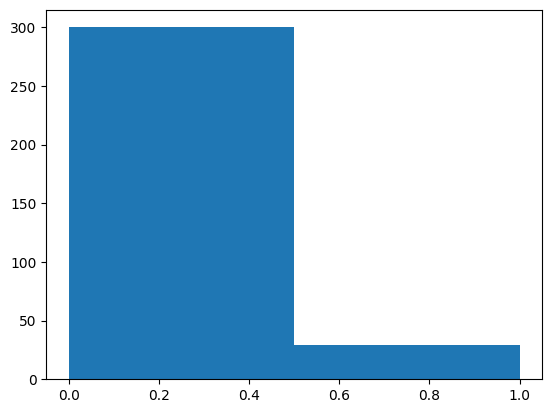

In [18]:
plt.hist(clase, bins=2)
plt.show()

# Clasificador Regresipon Logística

### Asignación de Pesos a Clases

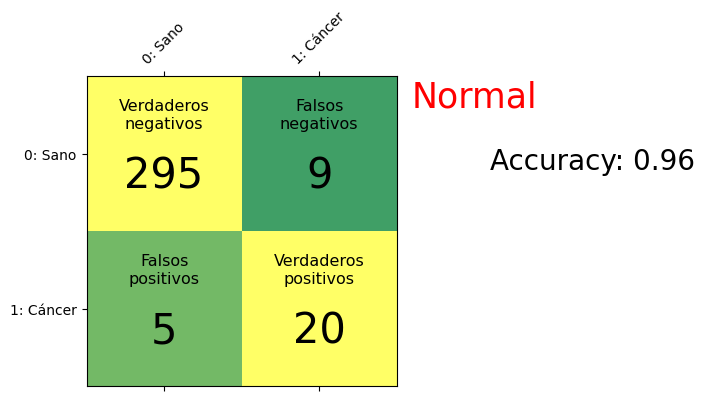

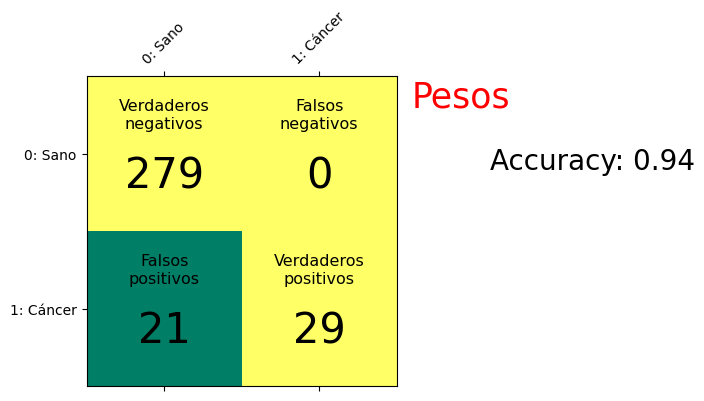

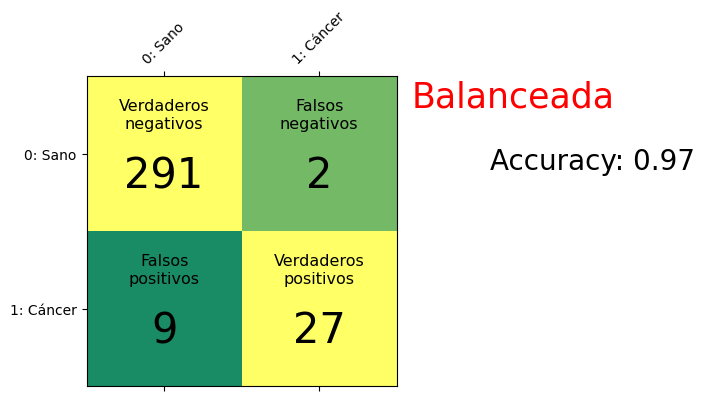

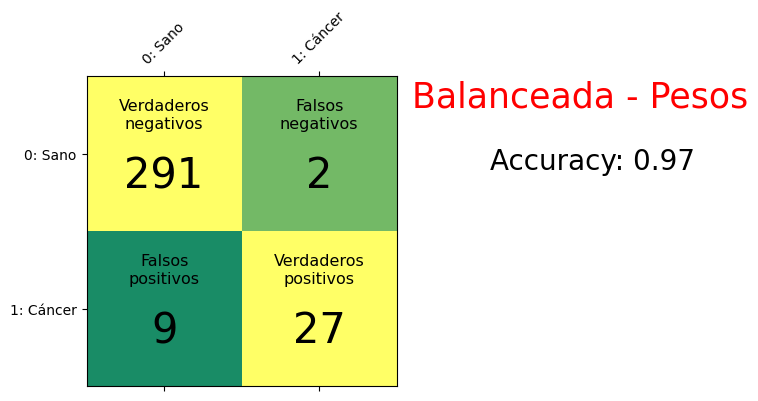

Pesos correspondientes: 0.55 5.5


In [26]:
# Asegurarnos que las clases son unidimensionales y numéricas
clase = pd.to_numeric(info.iloc[:, -1])

# Asegurarnos de que los datos sean numéricos
datos = info.iloc[:, :-1].apply(pd.to_numeric)

# Entrenar el modelo de regresión logística
modelo = LogisticRegression().fit(datos, clase)

# Mostramos la matriz de confusión
matriz_de_confusion(clase, modelo.predict(datos), "Normal")

# Dando pesos a nuestras clases
clase = pd.to_numeric(info.iloc[:, -1])

datos = info.iloc[:, :-1].apply(pd.to_numeric)

modelo = LogisticRegression(class_weight={0 : 1, 1 : 100}).fit(datos, clase)

matriz_de_confusion(clase, modelo.predict(datos), "Pesos")

# Ponemos la Eurística balanceada
clase = pd.to_numeric(info.iloc[:, -1])

datos = info.iloc[:, :-1].apply(pd.to_numeric)

modelo = LogisticRegression(class_weight="balanced").fit(datos, clase)

matriz_de_confusion(clase, modelo.predict(datos), "Balanceada")

# Dando los pesos exactos para la predicción
clase = pd.to_numeric(info.iloc[:, -1])

datos = info.iloc[:, :-1].apply(pd.to_numeric)

modelo = LogisticRegression(class_weight={0 : 0.55, 1 : 5.5}).fit(datos, clase)

matriz_de_confusion(clase, modelo.predict(datos), "Balanceada - Pesos")


# imprimimos los potenciales pesos
print("Pesos correspondientes:", 330/(2*300), 330/(2*30))